In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('MERGED_FOOD_DATA_WITH_GRAMS.csv')
X = df.drop(columns=['food', 'serving_size', 'Category'])  
y = df['Category'].astype('category').cat.codes          


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1916, 35)
Test set shape: (479, 35)


In [12]:
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7724425887265136

Confusion Matrix:
 [[  0   0   0   0   0   3   0   0   0]
 [  0   9   0   0   0   8   0   0   0]
 [  1   0   1   0   0   7   0   0   0]
 [  0   0   0   6   0  17   0   0   0]
 [  0   1   0   0   6  36   0   0   0]
 [  0   2   0   2   1 348   0   0   0]
 [  0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   1   0   0   0   9   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.69      0.53      0.60        17
           2       1.00      0.11      0.20         9
           3       0.75      0.26      0.39        23
           4       0.86      0.14      0.24        43
           5       0.78      0.99      0.87       353
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        10

    accuracy                    

C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


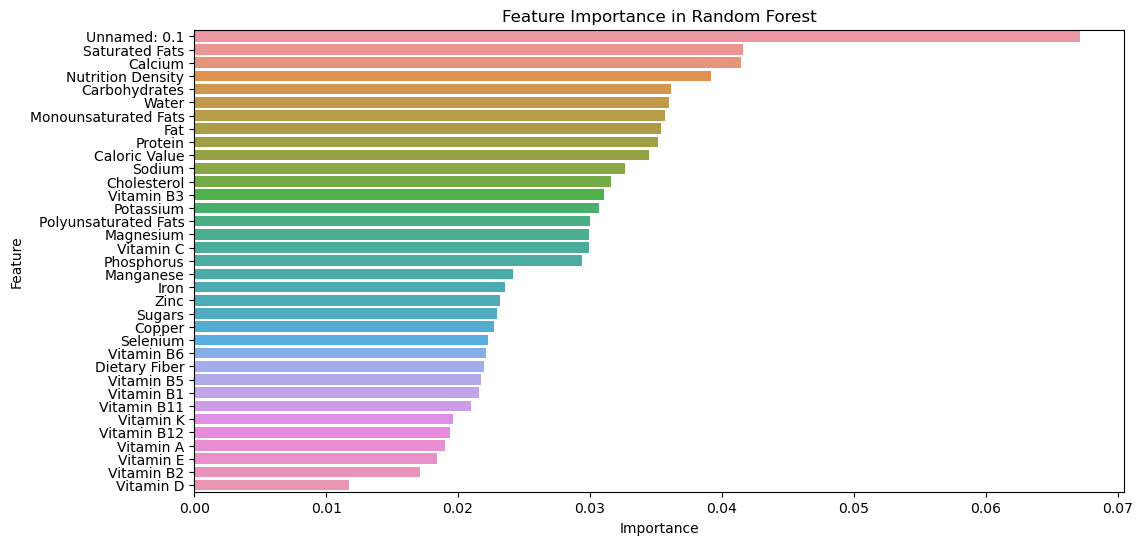

In [5]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


In [14]:
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.58663883 0.75574113 0.54070981 0.73903967 0.73903967]
Mean CV Accuracy: 0.6722338204592901


In [7]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.58663883 0.75574113 0.54070981 0.73903967 0.73903967]
Mean CV Accuracy: 0.6722338204592901


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Optimized Model Accuracy: 0.7724425887265136

Optimized Confusion Matrix:
 [[  0   0   0   0   0   3   0   0   0]
 [  0   9   0   0   0   8   0   0   0]
 [  0   0   1   0   0   8   0   0   0]
 [  0   0   0   6   0  17   0   0   0]
 [  0   1   0   0   6  36   0   0   0]
 [  0   2   0   2   1 348   0   0   0]
 [  0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   1   0   0   0   9   0   0   0]]

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.69      0.53      0.60        17
           2       1.00      0.11      0.20         9
           3       0.75      0.26      0.39        23
           4       0.86      0.14      0.24        43
           5       0.77      0.99      0.87       353
           6   

C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


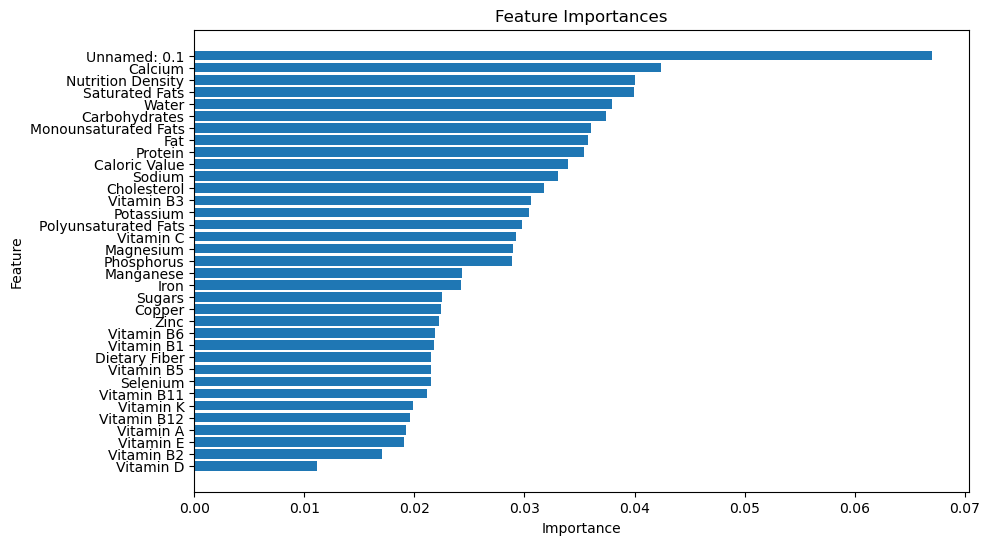

In [17]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_best = best_model.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nOptimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()